In [1]:
# New Model for Evalutaing
import numpy as np
# Make a bigger dataset
x = np.arange(-100, 100, 4)
x

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [2]:
# Labels

y=np.arange(-90,110,4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [3]:
# same results as above

y=x+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Split data into training / Test set

In [4]:
len(x)

50

In [5]:
# Split data into train and test sets 
x_train=x[:40]
y_train=y[:40]

x_test=x[40:]
y_test=y[40:]

len(x_train),len(x_test)

(40, 10)

Visualizing the Data

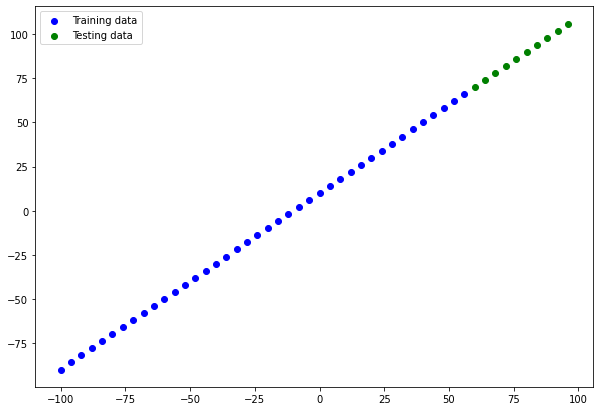

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))
# Plot training data in blue

plt.scatter(x_train,y_train,c='b',label='Training data')

#plot test data in green

plt.scatter(x_test,y_test,c='g',label='Testing data')

# show the legend
plt.legend();

In [7]:
import tensorflow as tf

# set random seed

tf.random.set_seed(42)

# create a model 

model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1,input_shape=[1])
])

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])



In [8]:
# This will work after specifying the input shape
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Fit the Model

model.fit(x_train,y_train,epochs=100,verbose=0)

In [10]:
# Check the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


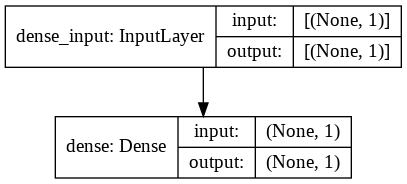

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

Visualizing the Predictions


In [12]:
y_preds=model.predict(x_test)

In [13]:
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [14]:

def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

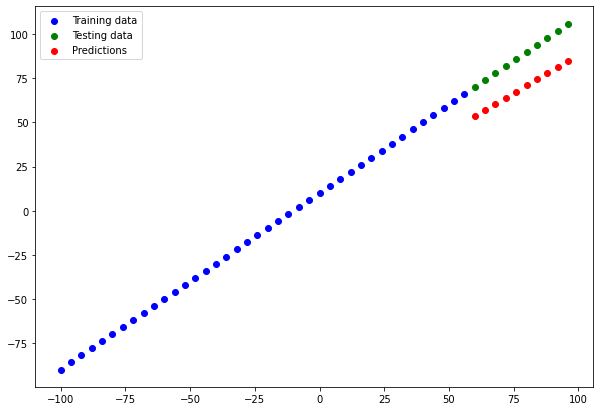

In [15]:
plot_predictions()

NoW Evaluating Predictions

In [16]:
# Evaluate

model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 129ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [17]:
# Mae

mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=y_preds)

In [18]:
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

In [19]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [20]:
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [21]:
y_test.shape,y_preds.shape

((10,), (10, 1))

In [22]:
# making both same shape

y_preds.squeeze().shape

(10,)

In [25]:
# same shape
y_preds.squeeze().shape,y_test.shape

((10,), (10,))

In [26]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>